# BI-PRS: semestrální projekt 2

Cílem druhého semestrálního projektu je prozkoumat závislost konkrétní proměnné na různých regresorech z přiřazeného datasetu.

Náš tým se skládá ze tří lidí: Ruslana Orazbekova (orazbrus), Nelly Shikina (shikinel), Daria Sychova (sychodar). Reprezentatntem v prvním semestrálním projektu je Daria Sychova. Nejprve určíme, který soubor dat a kterou proměnnou budeme v rámci semestrálního projektu analyzovat.

In [2]:
# K = den narození reprezentanta skupiny (1-31)
# L = počet písmen v příjmení reprezentanta
# M = ((K+L)×47)mod11+1.

K <- 10
L <- nchar('Sychova')
M <- ((K + L) * 47) %% 11 + 1
print(M)

[1] 8


ex0918: Researchers studied the development of a fly (Drosophila subobscura) that had been accidentally
introduced from the Old World into North America around 1980
Vysvětlovaná proměnná: Ratio
Popis: Poměr velikosti křídel ku délce much

## Uloha 1

#### Načtěme bibliotéky a požadovanou sadu dat:

In [25]:
library(Sleuth2)
library(mgcv)  

In [13]:
data(ex0918)

In [14]:
str(ex0918)

'data.frame':	21 obs. of  8 variables:
 $ Continent: Factor w/ 2 levels "NA","EU": 1 1 1 1 1 1 1 1 1 2 ...
 $ Latitude : num  35.5 37 38.6 40.7 40.9 42.4 45 46.8 48.8 49.8 ...
 $ Females  : num  901 896 906 907 898 893 913 915 927 924 ...
 $ SE.F     : num  2.5 3.5 3 3.5 3.6 3.4 4.3 3.8 2 4.5 ...
 $ Males    : num  797 806 812 807 818 809 810 819 800 823 ...
 $ SE.M     : num  3.8 3 3.2 3.2 2.7 3.3 4.3 3.3 4.9 2.2 ...
 $ Ratio    : num  0.831 0.834 0.836 0.833 0.83 0.828 0.834 0.825 0.832 0.824 ...
 $ SE.R     : num  0.01 0.014 0.012 0.013 0.012 0.015 0.024 0.014 0.009 0.011 ...


#### Data srtucture
**Continent** a factor with levels "NA" and "EU"  
**Latitude** latitude (degrees)  
**Females** average wing size (103×log mm) of female flies on log scale  
**SE.F** standard error of wing size (103×log mm) of female flies on log scale  
**Males** average wing size (103×log mm) of male flies on log scale  
**SE.M** standard error of wing size (103×log mm) of male flies on log scale  
**Ratio** average basal length to wing size ratios of female flies  
**SE.R** standard error of average basal length to wing size ratio of female flies  

In [15]:
head(ex0918)

,Continent,Latitude,Females,SE.F,Males,SE.M,Ratio,SE.R
,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,NA,35.5,901,2.5,797,3.8,0.831,0.010
2,NA,37.0,896,3.5,806,3.0,0.834,0.014
3,NA,38.6,906,3.0,812,3.2,0.836,0.012
4,NA,40.7,907,3.5,807,3.2,0.833,0.013
5,NA,40.9,898,3.6,818,2.7,0.830,0.012
6,NA,42.4,893,3.4,809,3.3,0.828,0.015


In [7]:
summary(ex0918)

 Continent    Latitude       Females         SE.F           Males      
 NA: 9     Min.   :35.5   Min.   :889   Min.   :2.000   Min.   :789.0  
 EU:12     1st Qu.:40.7   1st Qu.:901   1st Qu.:3.200   1st Qu.:807.0  
           Median :45.0   Median :915   Median :3.500   Median :812.0  
           Mean   :44.6   Mean   :914   Mean   :3.652   Mean   :815.1  
           3rd Qu.:48.8   3rd Qu.:926   3rd Qu.:4.300   3rd Qu.:819.0  
           Max.   :56.1   Max.   :944   Max.   :6.100   Max.   :855.0  
      SE.M           Ratio            SE.R        
 Min.   :2.200   Min.   :0.809   Min.   :0.00700  
 1st Qu.:3.100   1st Qu.:0.824   1st Qu.:0.01200  
 Median :3.300   Median :0.826   Median :0.01300  
 Mean   :3.724   Mean   :0.827   Mean   :0.01476  
 3rd Qu.:4.300   3rd Qu.:0.832   3rd Qu.:0.01600  
 Max.   :6.200   Max.   :0.836   Max.   :0.03200  

Vidíme, že údaje pro female a male se významně neliší. Standard error pro female od 2.000 do 6.100 pro male od 2.200 do 6.200

In [16]:
# Checking if we have NaN values
any_na <- any(is.na(ex0918))
print(any_na)

[1] FALSE


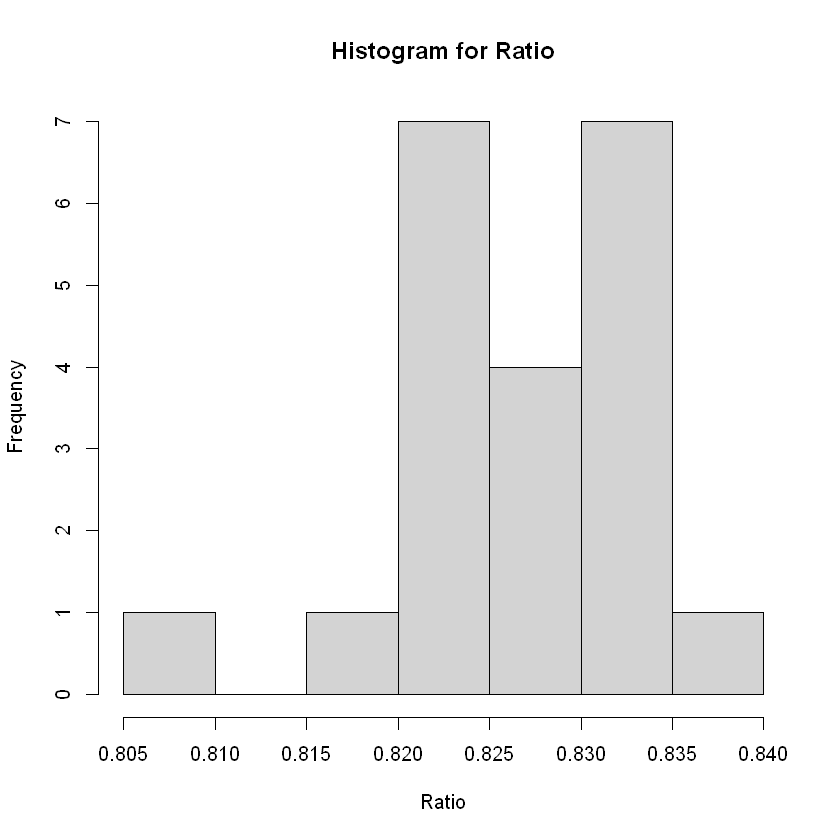

In [20]:
hist(ex0918$Ratio, main="Histogram for Ratio", xlab="Ratio")

Tento histogram zobrazuje rozdělení proměnné 'Ratio'. Většina datových bodů se shromažďuje ve středních hodnotách. Histogram naznačuje, že distribuce proměnné 'Ratio' není rovnoměrná a ukazuje na bimodální nebo jine ne-standardní rozdělení dat.

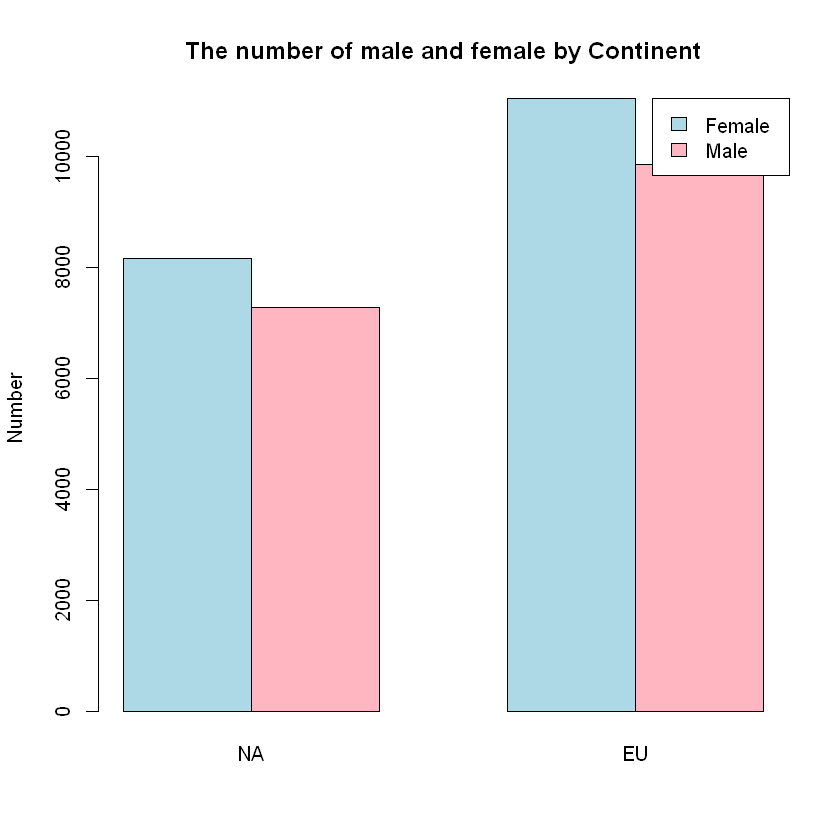

In [31]:
sum_females <- aggregate(Females ~ Continent, data = ex0918, sum)
sum_males <- aggregate(Males ~ Continent, data = ex0918, sum)

# Vytvoření sloupcového grafu
barplot(rbind(sum_females$Females, sum_males$Males), 
        beside = TRUE, 
        col = c("lightblue", "lightpink"),
        names.arg = sum_females$Continent,
        legend.text = c("Female", "Male"),
        args.legend = list(x = "topright"),
        main = "The number of male and female by Continent",
        ylab = "Number")

Na základě tohoto grafu vidíme, že počet samcu mírně převyšuje počet samic na obou kontinentech. Také počet much v Evropě je obecně vyšší než v Severní Americe.

# Uloha 2

#### Zkoumejme závislost vysvětlované proměnné na tomto regresoru.


Call:
lm(formula = SE.R ~ SE.F, data = ex0918)

Residuals:
       Min         1Q     Median         3Q        Max 
-0.0070602 -0.0024988 -0.0005501  0.0010938  0.0133473 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)   
(Intercept) 0.002379   0.004037   0.589  0.56263   
SE.F        0.003390   0.001070   3.170  0.00505 **
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.004671 on 19 degrees of freedom
Multiple R-squared:  0.3459,	Adjusted R-squared:  0.3115 
F-statistic: 10.05 on 1 and 19 DF,  p-value: 0.005045


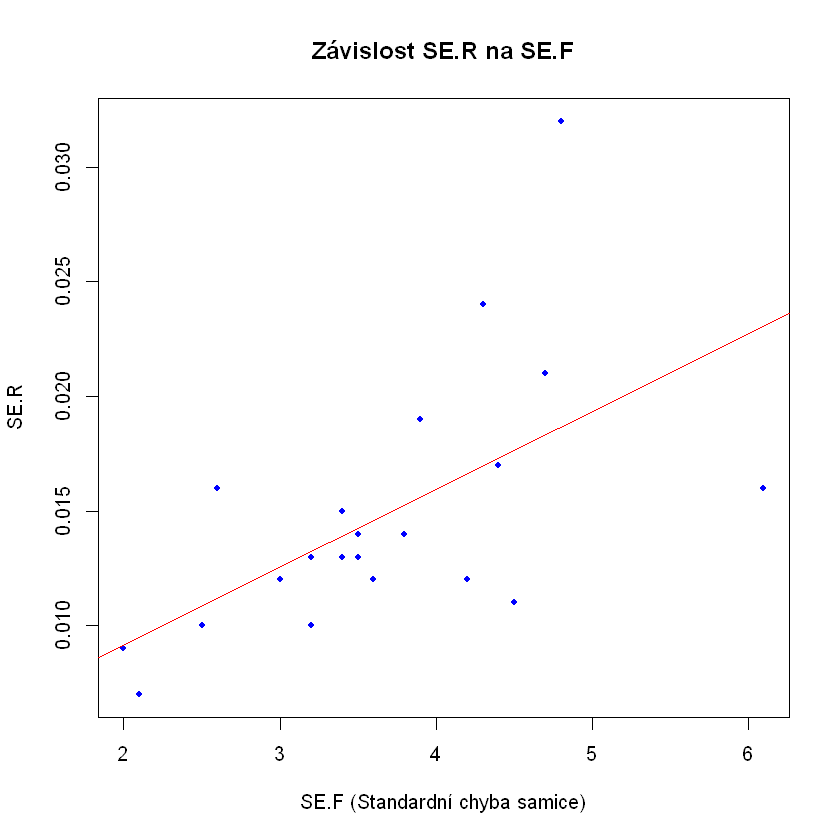

In [48]:
# Lineární regresní model SE.R jako funkce SE.F
model_SE <- lm(SE.R ~ SE.F, data = ex0918)

# Zobrazení výsledků modelu
summary(model_SE)

# Grafické zobrazení modelu s bodovým grafem a regresní linií
plot(ex0918$SE.F, ex0918$SE.R, 
     main = "Závislost SE.R na SE.F", 
     xlab = "SE.F (Standardní chyba samice)", 
     ylab = "SE.R", 
     pch = 20, 
     col = "blue")

# Přidání regresní linie do grafu
abline(model_SE, col = "red")


Podle výsledků regresní analýzy a grafu můžeme dělat následující závěry:

* Koeficienty modelu: hodnota interceptu je velmi nízká a statisticky nevýznamná s p-hodnotou 0.56263, což naznačuje, že když je SE.F nula, odhadovaná hodnota SE.R je blízká nule. Koeficient pro SE.F je přibližně 0.00339 a je statisticky významný (p-hodnota = 0.00505), což ukazuje, že existuje pozitivní vztah mezi SE.F a SE.R.

* Kvalita modelu: hodnota R-kvadrátu je 0.3459, což značí, že model vysvětluje přibližně 34.59% variability SE.R. Upravený R-kvadrát je nižší, 0.3115, ale stále indikuje, že SE.F má určitý významný vliv na SE.R.

* Vizualizace modelu: graf ukazuje, že s nárůstem SE.F roste i SE.R, což je v souladu s pozitivním koeficientem uvedeným ve výsledcích modelu. Body jsou rozptýleny a regresní čára ukazuje zvyšující se trend.

* Závěr: tento model ukazuje, že standardní chyba pro samice (SE.F) je relevantním prediktorem pro standardní chybu poměru (SE.R). 

# Uloha 3